# Week 8 HW

Consder the following linear program

$\begin{aligned}
\text{min} & \ -2x_1 - 3x_2 \\
\text{s.t.} & \ x_1 + x_2 & \le 35 \\
 & \ 3x_1 + 2x_2 & \le 100 \\
 & \ 2x_1 + 4x_2 & \le 120 \\
 & \ x_1,x_2 & \ge 0 
\end{aligned}$

#### (1) Draw the feasible region of this linear program.

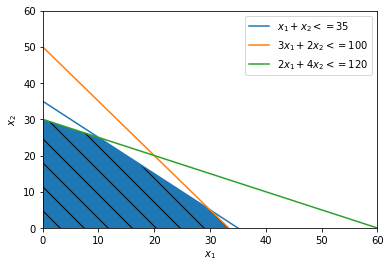

In [17]:
#plot the solution using matplotlib
import matplotlib.pyplot as plt
import numpy as np

# x-values for our plot
xmax = 60
ymax = 60
x = np.arange(0, xmax, 0.1)

# the constraints to plot
y1 = 35. - x
y2 = 100. / 2. - 3.*x/ 2.
y3 = 120. / 4. - 2.*x / 4.

# plot the constraints
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.plot(x, y1, x, y2, x, y3, label='Feasible Region')
plt.legend([r'$x_1 + x_2 <= 35$', r'$3x_1 + 2x_2 <= 100$', r'$2x_1 + 4x_2 <= 120$']);
plt.xlabel(r'$x_1$');
plt.ylabel(r'$x_2$');

# fill in the feasable region (using a polygon)
xp = [0, 0, 10, 30, 100./3.]
yp = [0, 30, 25, 5, 0]
plt.fill(xp ,yp, hatch='\\');

#### (2) Transform it into a standard form LP

Transforming into the standard form LP only requires the introduction of slack variables $(x_3, x_4, x_5)$. This yields:

$\begin{aligned}
\text{min} & \ -2x_1 - 3x_2 \\
\text{s.t.} & \ x_1 + x_2 + x_3 & = 35 \\
 & \ 3x_1 + 2x_2 + x_4 & = 100 \\
 & \ 2x_1 + 4x_2 + x_5 & = 120 \\
 & \ x_1,x_2,x_3,x_4,x_5 & \ge 0 \\
\end{aligned}$

Therefore:

$x = [x_1,x_2,x_3,x_4,x_5]^T \\
c = [-2, -3, 0, 0, 0]^T \\
b = [35,100,120]^T$

$A = \begin{bmatrix} 1 & 1 & 1 & 0 & 0 \\ 3 & 2 & 0 & 1 & 0 \\ 2 & 4 & 0 & 0 & 1 \end{bmatrix}$

It may be worth noting that this same LP was solved in hte previous HW assignment, therefore we know the optimal of $-95$ is at $(x_1, x_2) = (10, 25)$.

#### (3) Solve using simplex method starting with basis $[A_3, A_4, A_5]$

**for k = 1**, we have indices 3, 4, and 5 as basic variables and 1 and 2 as non-basic variables.

$B = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

$B^{-1} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

$x_B = [x_3, x_4, x_5]^T = B^{-1}b = [35, 100, 120]^ T \\
x_N = [x_1, x_2]^T = [0, 0]^T \\
c_B = [0, 0, 0]^T \\
c_N = [-2, -3]^T \\
\bar{c_1} = -2 - c_B B^{-1} A_1 = -2 \\
\bar{c_2} = -3 - c_B B^{-1} A_2 = -3$

This corresonds to the point $(x_1, x_2) = (0, 0)$ on the graph shown in part 1.

This solution is not optimal because the reduced costs are negative. We have 2 negative values, therefore we'll use Bland's rule to choose the non-basic variable $x_1$ to enter the basis. Therefore, in choosing a direction,

$d_N = [1, 0]^T \\
d_B = -B^{-1} A_1 = [-1, -3, -2]^T$

Since we have $d_B$ values that are negative, we do not have an unbounded optimal solution.  Therefore we can continue, and we need to determine a step size.

$x_B + \theta d_B = [35 - \theta, 100 - 3\theta, 120 - 2\theta]^T \\
\theta = min \{35, \frac{100}{3}, 60 \} = \frac{100}{3}$

Therefore the basic variable $x_4$ will exit the basis.

**for k = 2**, we have indices 1, 3, and 5 as basic variables and 2 and 3 as non-basic variables.

$B = [A_1, A_3, A_5] = \begin{bmatrix} 1 & 1 & 0 \\ 3 & 0 & 0 \\ 2 & 0 & 1 \end{bmatrix}$

$B^{-1} = \begin{bmatrix} 0 & \frac{1}{3} & 0 \\ 1 & \frac{-1}{3} & 0 \\ 0 & \frac{-2}{3} & 1 \end{bmatrix}$

$x_B = [x_1, x_3, x_5]^T = B^{-1}b = [\frac{100}{3} \frac{5}{3} \frac{160}{3}]^ T \\
x_N = [x_2, x_4]^T = [0, 0]^T \\
c_B = [-2, 0, 0]^T \\
c_N = [-3, 0]^T \\
\bar{c_2} = -3 - c_B B^{-1} A_2 = \frac{-5}{3} \\
\bar{c_4} = 0 - c_B B^{-1} A_4 = 0$

This corresponds to the point $(x_1, x_2) = (100/3, 0)$ in the graph shown in part 1.

This solution is not optimal because one of the costs is negative. We choose the non-basic variable $x_2$ to enter the basis since it is negative. Therefore, in choosing a direction,

$d_N = [1, 1]^T \\
d_B = -B^{-1} A_2 = [\frac{-2}{3}, \frac{-1}{3}, \frac{-8}{3}]^T$

Since we have $d_B$ values that are negative, we do not have an unbounded optimal solution.  Therefore, we need to determine a step size.

$x_B + \theta d_B = [\frac{100}{3} - \theta\frac{2}{3}, \frac{5}{3} - \theta\frac{1}{3}, \frac{160}{3} - \theta\frac{8}{3}]^T \\
\theta = min \{50, 5, 20 \} = 5$

Therefore the basic variable $x_3$ will exit the basis.

**for k = 3**, we have indices 1, 2, and 5 as basic variables and 3 and 4 as non-basic variables.

$B = [A_1, A_2, A_5] = \begin{bmatrix} 1 & 1 & 0 \\ 3 & 2 & 0 \\ 2 & 4 & 1 \end{bmatrix}$

$B^{-1} = \begin{bmatrix} -2 & 1 & 0 \\ 3 & -1 & 0 \\ -8 & 2 & 1 \end{bmatrix}$

$x_B = [x_1, x_2, x_5]^T = B^{-1}b = [30, 5, 40]^ T \\
x_N = [x_3, x_4]^T = [0, 0]^T \\
c_B = [-2, -3, 0]^T \\
c_N = [0, 0]^T \\
\bar{c_3} = 0 - c_B B^{-1} A_3 = 5 \\
\bar{c_4} = 0 - c_B B^{-1} A_4 = -1$

This corresponds to the point $(x_1, x_2) = (30, 5)$ in the graph shown in part 1.

This solution is not optimal because one of the costs is negative. We choose the non-basic variable $x_4$ to enter the basis since it is negative. Therefore, in choosing a direction,

$d_N = [1, 1]^T \\
d_B = -B^{-1} A_4 = [-1, 1, -2]^T$

Since we have $d_B$ values that are negative, we do not have an unbounded optimal solution.  Therefore, we need to determine a step size.

$x_B + \theta d_B = [30 - \theta, 40 - 2\theta]^T \\
\theta = min \{30, 20 \} = 20$

Therefore the basic variable $x_5$ will exit the basis.

**for k = 4**, we have indices 1, 2, and 4 as basic variables and 3 and 5 as non-basic variables.

$B = [A_1, A_2, A_4] = \begin{bmatrix} 1 & 1 & 0 \\ 3 & 2 & 1 \\ 2 & 4 & 0 \end{bmatrix}$

$B^{-1} = \begin{bmatrix} -2 & 0 & \frac{-1}{2} \\ -1 & 0 & \frac{-1}{2} \\ -4 & 1 & \frac{1}{2} \end{bmatrix}$

$x_B = [x_1, x_2, x_4]^T = B^{-1}b = [10, 25, 20]^ T \\
x_N = [x_3, x_5]^T = [0, 0]^T \\
c_B = [-2, -3, 0]^T \\
c_N = [0, 0]^T \\
\bar{c_3} = 0 - c_B B^{-1} A_3 = 1 \\
\bar{c_5} = 0 - c_B B^{-1} A_5 = \frac{1}{2}$

This corresponds to the point $(x_1, x_2) = (10, 25)$ in the graph shown in part 1.

This solution is optimal because all of the costs are nonnegative. Therefore the optimal is $(x_1,x_2) = (10,25)$ with optimal value = $-95$.